In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("dataset/insurance_claims_V3.csv")

In [4]:
df.shape


(1000, 128)

In [5]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital_gains', 'capital_loss',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'vehicle_claim',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=128)

In [16]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size =0.2,random_state=12)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)


In [9]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [26]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    f1 = f1_score(y_test, ypred)

# Affichage du F1-score
    print("F1-score :", f1)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    CMTD = pd.crosstab(y_test,ypred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(CMTD, 
                xticklabels=['Fraudulant', 'Legit'],
                yticklabels=['Fraudulant', 'Legit'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    
    N, train_score, val_score = learning_curve(model,X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Liste des modèles à tester
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVC": make_pipeline(StandardScaler(), SVC(random_state=42)),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}





Évaluation du modèle : Logistic Regression
F1-score : 0.6206896551724138
[[160  10]
 [ 12  18]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       170
         1.0       0.64      0.60      0.62        30

    accuracy                           0.89       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.89      0.89      0.89       200



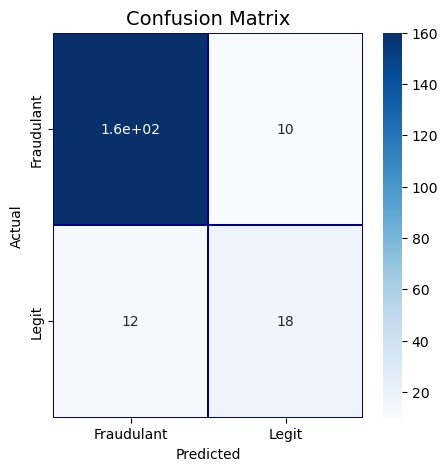


Évaluation du modèle : Random Forest
F1-score : 0.0625
[[169   1]
 [ 29   1]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       170
         1.0       0.50      0.03      0.06        30

    accuracy                           0.85       200
   macro avg       0.68      0.51      0.49       200
weighted avg       0.80      0.85      0.79       200



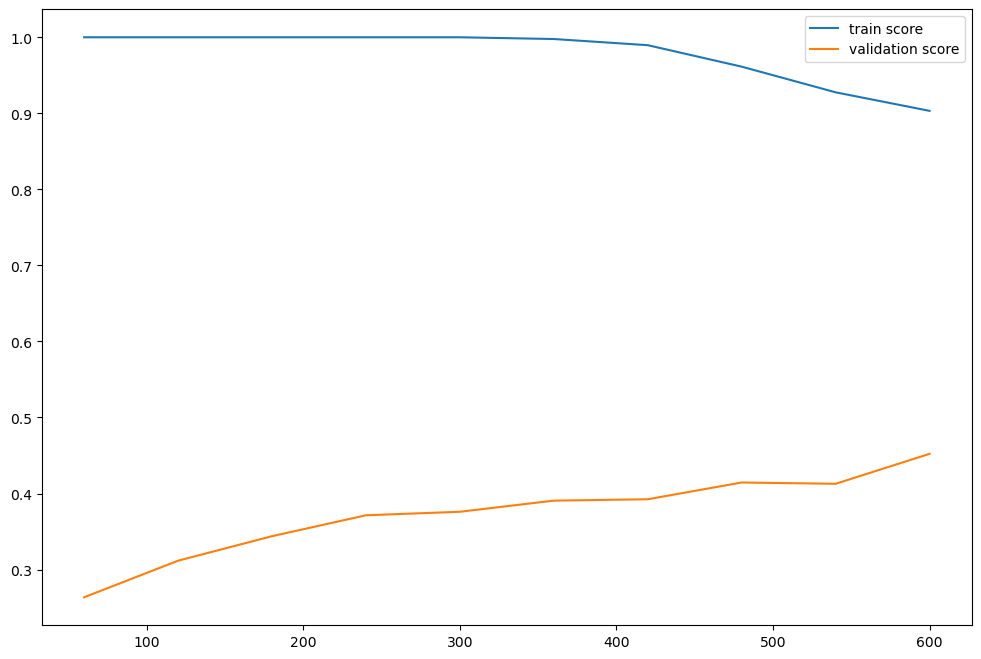

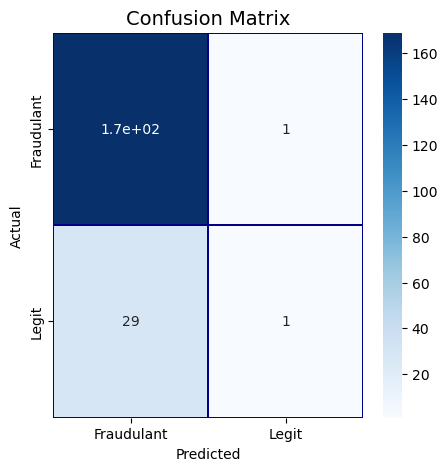


Évaluation du modèle : Gradient Boosting
F1-score : 0.56
[[164   6]
 [ 16  14]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       170
         1.0       0.70      0.47      0.56        30

    accuracy                           0.89       200
   macro avg       0.81      0.72      0.75       200
weighted avg       0.88      0.89      0.88       200



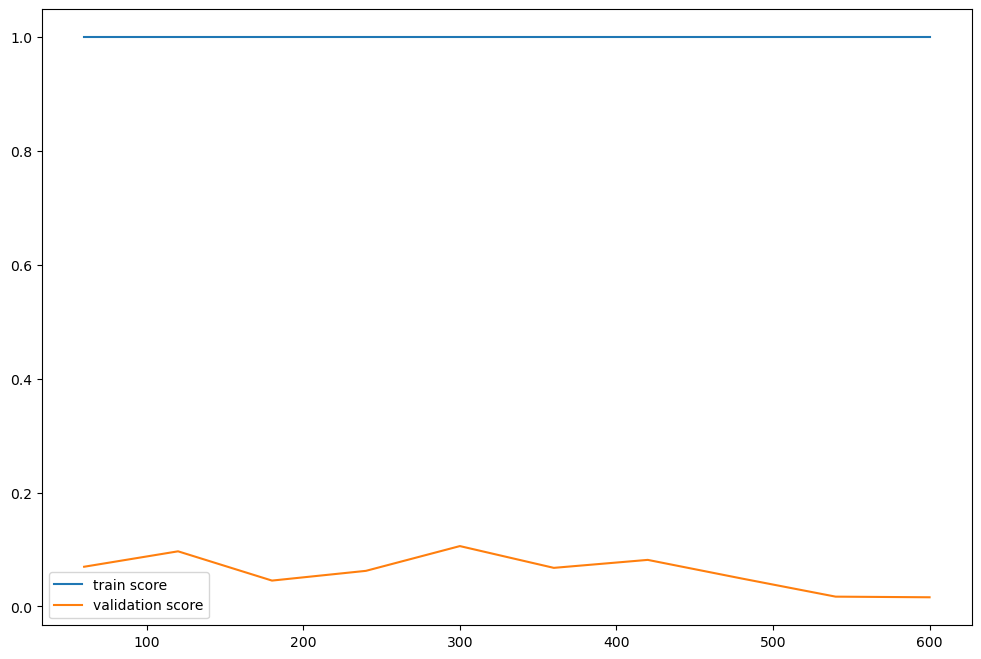

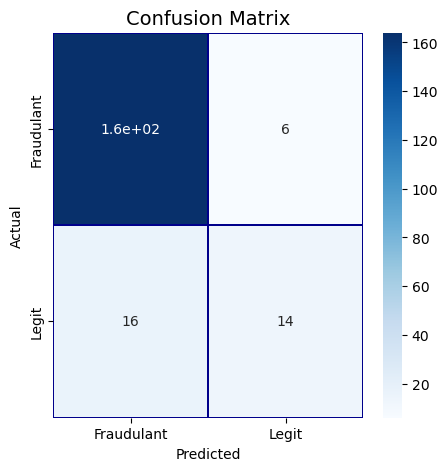


Évaluation du modèle : XGBoost
F1-score : 0.41860465116279066
[[166   4]
 [ 21   9]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       170
         1.0       0.69      0.30      0.42        30

    accuracy                           0.88       200
   macro avg       0.79      0.64      0.67       200
weighted avg       0.86      0.88      0.85       200



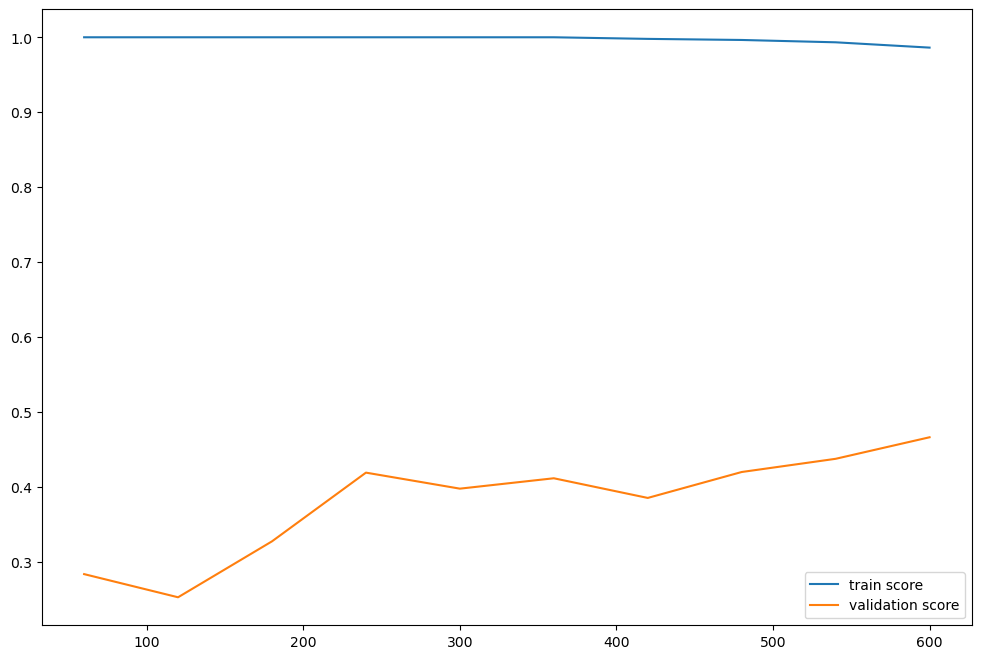

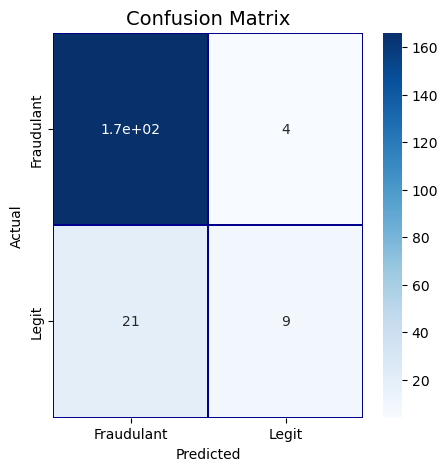


Évaluation du modèle : SVC
F1-score : 0.0
[[170   0]
 [ 30   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       170
         1.0       0.00      0.00      0.00        30

    accuracy                           0.85       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.72      0.85      0.78       200



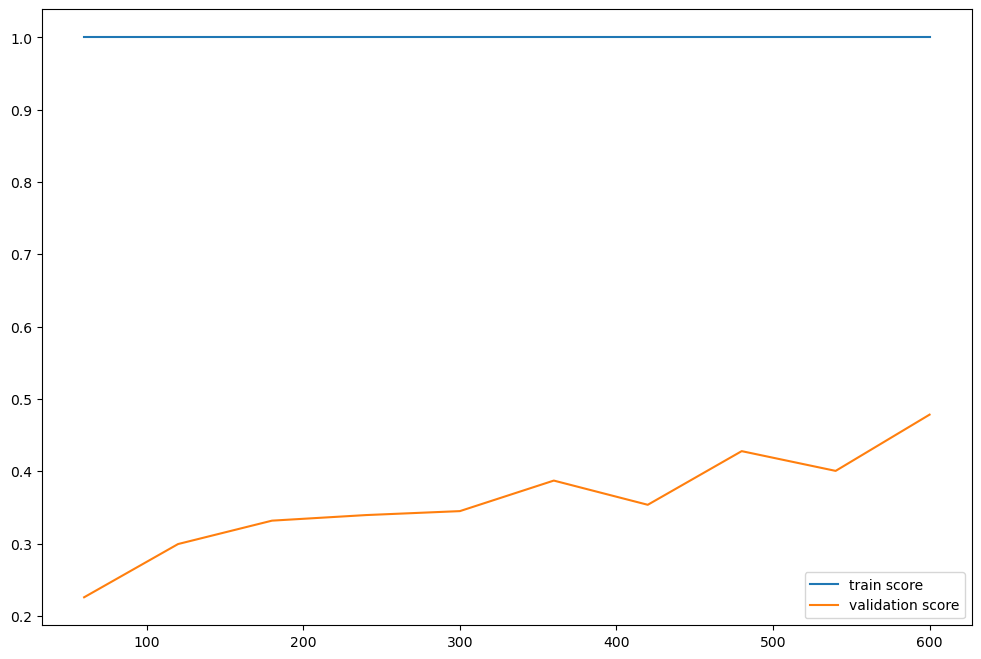

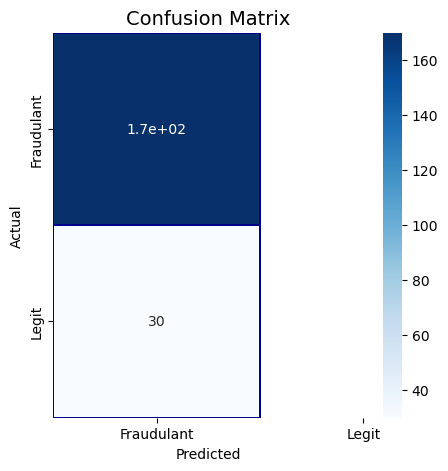


Évaluation du modèle : Decision Tree
F1-score : 0.4918032786885246
[[154  16]
 [ 15  15]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       170
         1.0       0.48      0.50      0.49        30

    accuracy                           0.84       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.85      0.84      0.85       200



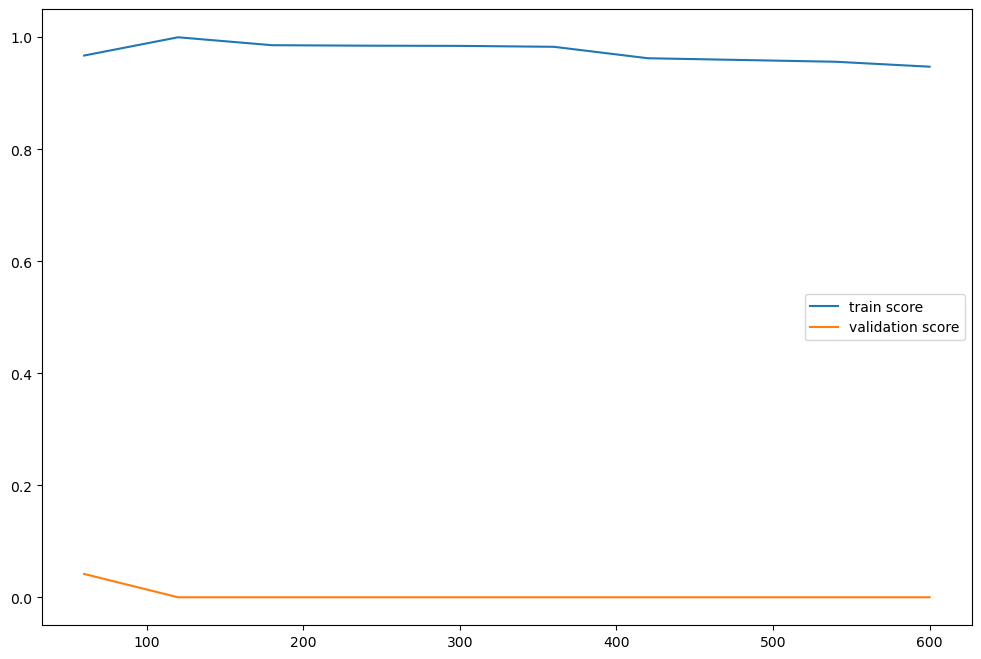

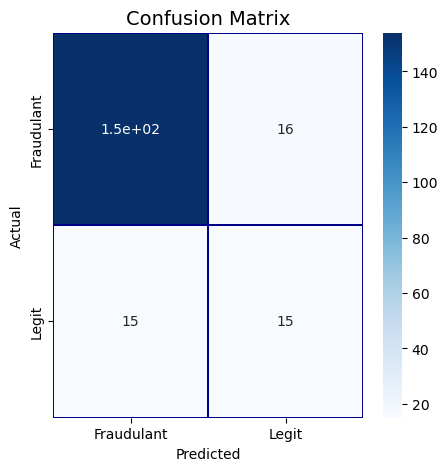


Évaluation du modèle : AdaBoost
F1-score : 0.5098039215686274
[[162   8]
 [ 17  13]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       170
         1.0       0.62      0.43      0.51        30

    accuracy                           0.88       200
   macro avg       0.76      0.69      0.72       200
weighted avg       0.86      0.88      0.87       200



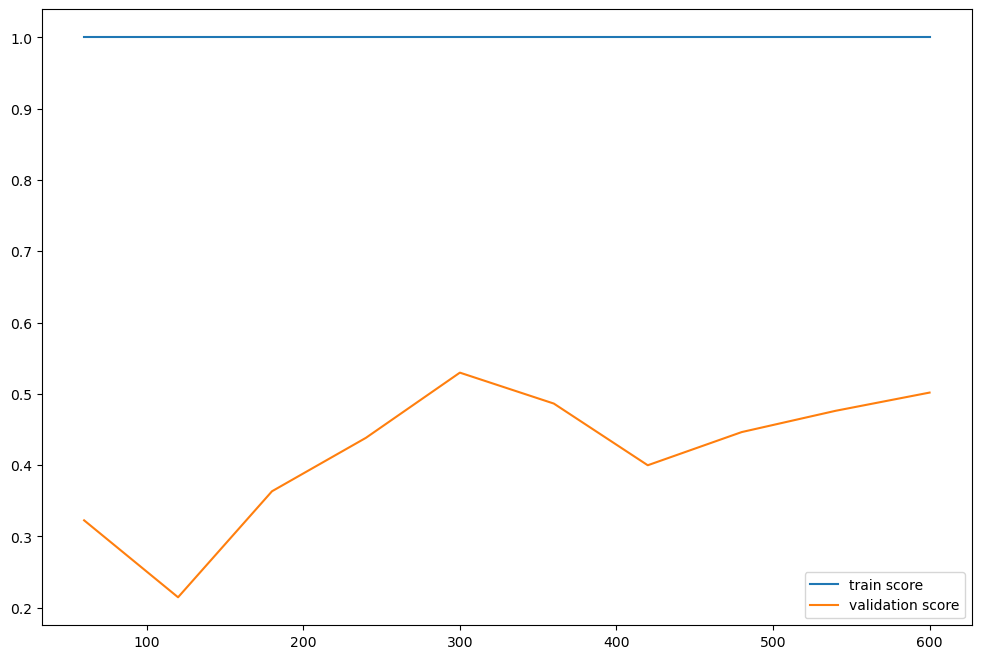

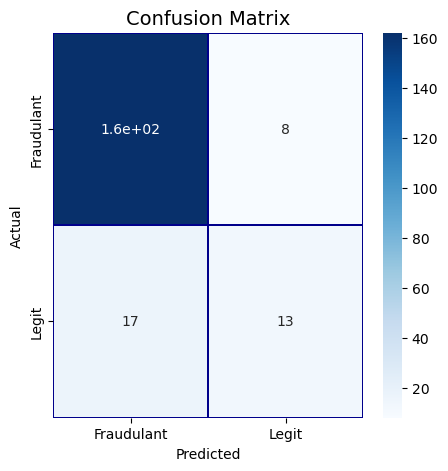


Évaluation du modèle : Extra Trees
F1-score : 0.2285714285714286
[[169   1]
 [ 26   4]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       170
         1.0       0.80      0.13      0.23        30

    accuracy                           0.86       200
   macro avg       0.83      0.56      0.58       200
weighted avg       0.86      0.86      0.82       200



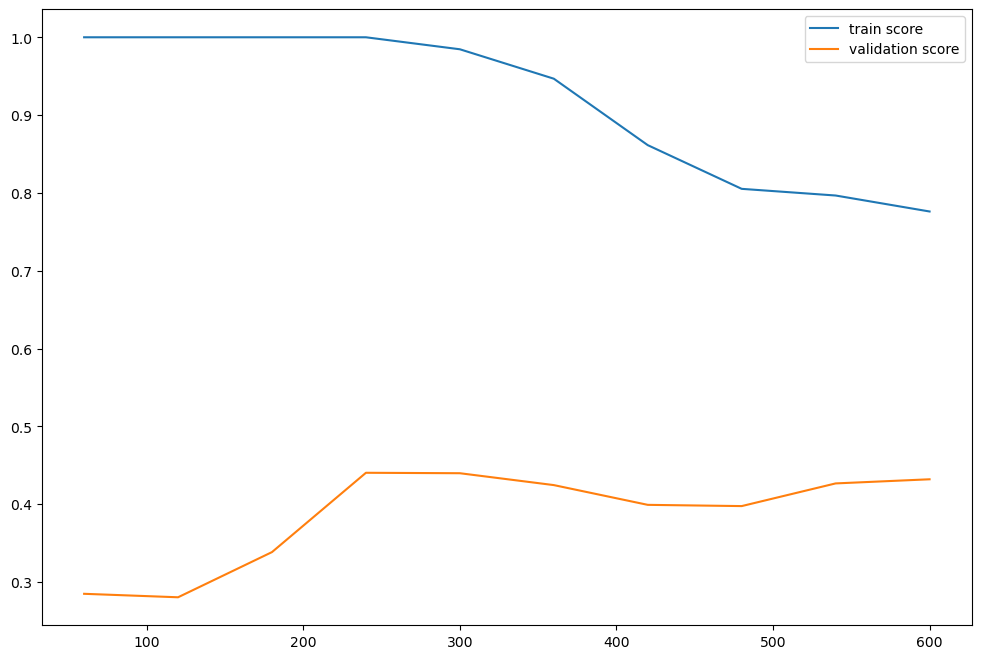

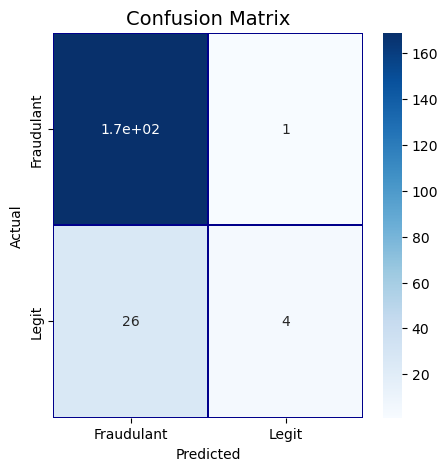


Évaluation du modèle : Naive Bayes
F1-score : 0.2898550724637681
[[141  29]
 [ 20  10]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       170
         1.0       0.26      0.33      0.29        30

    accuracy                           0.76       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.78      0.76      0.77       200



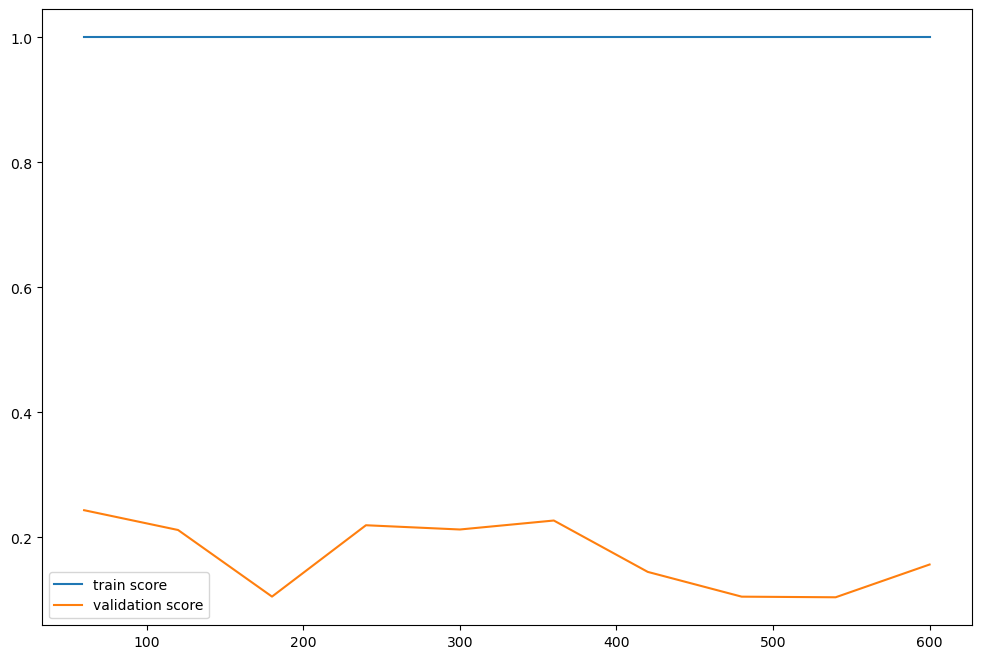

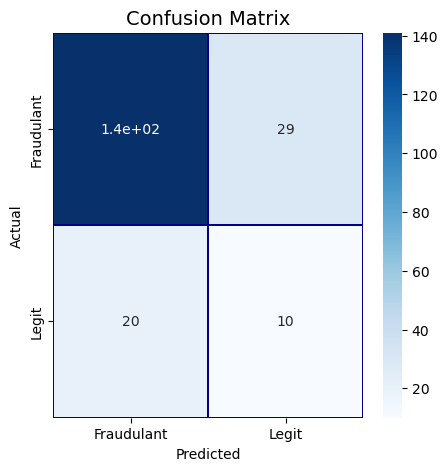

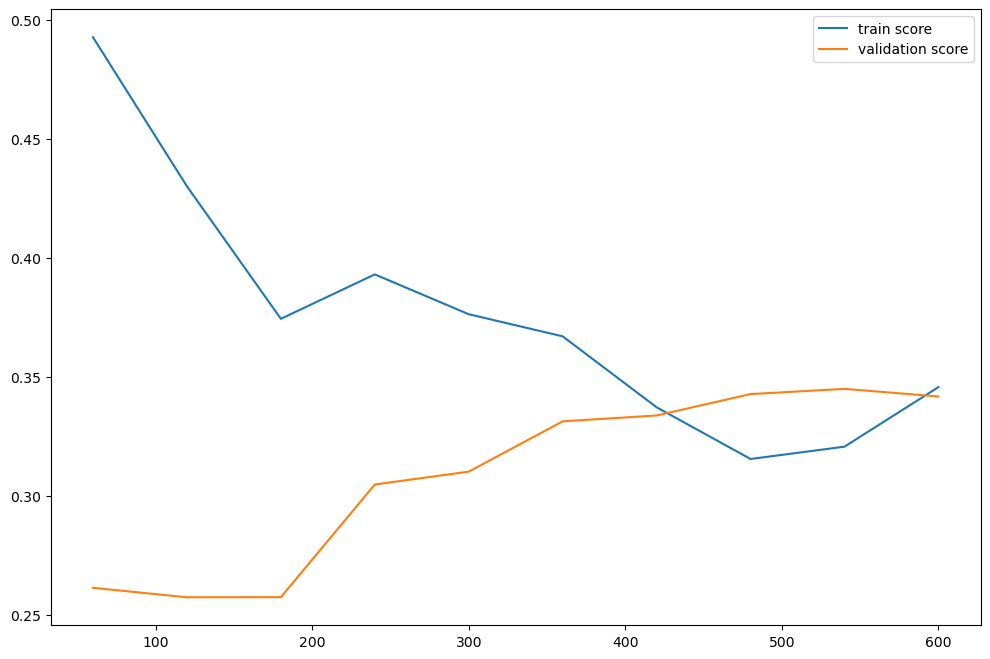

In [28]:
# Boucle sur chaque modèle pour évaluation
for model_name, model in models.items():
    print(f"\nÉvaluation du modèle : {model_name}")
    evaluation(model)

### OPTIMISATION

In [29]:
from sklearn.model_selection import GridSearchCV

# Définition des grilles de paramètres pour chaque modèle
param_grids = {
    "Logistic Regression": {
        'logisticregression__C': [0.01, 0.1, 1, 10, 100],
        'logisticregression__penalty': ['l2'],
        'logisticregression__solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    },
    "SVC": {
        'svc__C': [0.1, 1, 10, 100],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 1.5]
    },
    "Extra Trees": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Naive Bayes": {
        # Généralement, GaussianNB n'a pas beaucoup de paramètres, donc il n'y a pas de grille ici.
    }
}

# Boucle pour effectuer la recherche de grille sur chaque modèle
for model_name, model in models.items():
    if param_grids.get(model_name):  # Vérifie s'il existe une grille pour ce modèle
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='f1', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"\nMeilleurs paramètres pour {model_name} :")
        print(grid_search.best_params_)
        print(f"Meilleur score F1 pour {model_name} : {grid_search.best_score_}")
    else:
        print(f"\n{model_name} n'a pas de grille de paramètres.")



Meilleurs paramètres pour Logistic Regression :
{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Meilleur score F1 pour Logistic Regression : 0.498360433604336

Meilleurs paramètres pour Random Forest :
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Meilleur score F1 pour Random Forest : 0.10860497956150131

Meilleurs paramètres pour Gradient Boosting :
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Meilleur score F1 pour Gradient Boosting : 0.5288555347091933

Meilleurs paramètres pour XGBoost :
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Meilleur score F1 pour XGBoost : 0.5155145929339477

Meilleurs paramètres pour SVC :
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Meilleur score F1 pour SVC : 0.5103282203529605

Meilleurs paramètres pour Decision Tree :
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Meilleur

## Save the best model

In [30]:
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

F1-score : 0.6206896551724138
[[160  10]
 [ 12  18]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       170
         1.0       0.64      0.60      0.62        30

    accuracy                           0.89       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.89      0.89      0.89       200



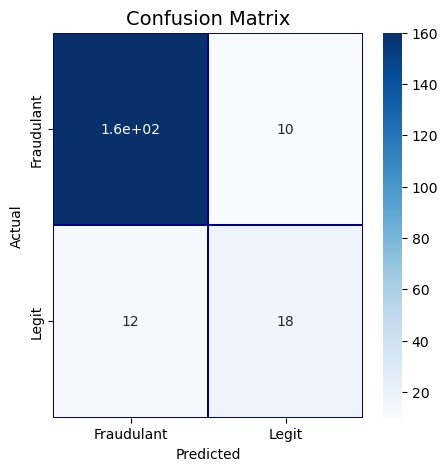

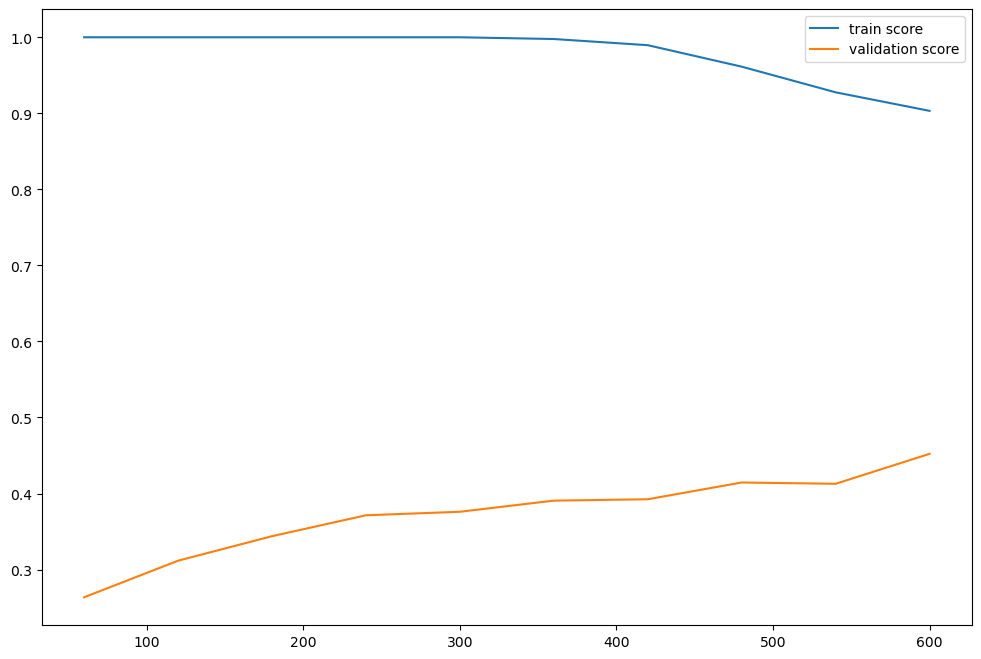

In [31]:
evaluation(model)

In [32]:
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Modèle sauvegardé sous le nom 'logistic_model.pkl'")

Modèle sauvegardé sous le nom 'logistic_model.pkl'
